## ${\color{salmon} {Problem\: Definition}}$
* In this fast-paced automated world, considering factors like risk management and financial analysis is crucial, especially for financial institutions and businesses, in order to make informed decisions about transactions and mitigate the risk of fraud.

* These entities need to determine whether a transaction is likely to be fraudulent or legitimate. Therefore, predicting fraud transactions could be a powerful tool that helps prevent financial losses or damages caused by fraudulent activities.

* Our model is a ${\color{skyblue} {Fraud\: Transaction\: Classifier}}$ based on the Naive Bayes algorithm. It classifies transactions as likely fraudulent or not, based on multiple features. For this model, we utilized data collected from various sources and considered 30 features for classification.

## ${\color{salmon} {Naïve\: Bayes}}$

* The Naive Bayes algorithm is a probabilistic machine learning algorithm used for classification tasks. The term ${\color{skyblue} {Naive}}$ in Naive Bayes signifies the assumption of feature independence. It assumes that the occurrence of a certain feature is independent of the occurrence of other features.

*  It is based on ${\color{skyblue} {Bayes'\: Theorem}}$ , which describes the probability of an event based on prior knowledge.
### ${\color {salmon} {Bayes\: Rule:}}$
$$P(Y|X)= (P(X= x0,x1,x2,..) | Y = y) P(Y) ) \over P(X)$$
* where (Y|X) is the posterior
* P(X= x0,x1,x2,..|Y = y) is the likelyhood
*  P(Y) is the prior
* P(X) is the evidence
---
 our goal is the find the values of likelihood and prior that would maximize the posterior



## ${\color{salmon} {The\: Application\: of\: Naïve\: Bayes}}$
###To reach the desired classification we will be using the Bayes' rule derviavtion:
$$P(X=x1|Y=y) \times P(X=x2|Y=y)\times..... \times P(X=xn|Y=y) \times P(Y=y)$$
given that n is the number of features we have
###A quick overview on the steps we will be taking
* $\color{skyblue}{Data\: Preparation:}$ First step is collecting historical data from multiple transactions, to be inclusive the data has to contain data from both, genuine transactions and fradulanet transactions. the data set should the features (indpenedent variables) and it's corresponsding status(dependent variable), whether it's genuine or not

* $\color {skyblue} {Data\: Preprocessing:}$ In this step we will clean and preprocess the dataset by handling the missing values, outlier and normalizing the features, then split the data into training set and testing set

* $\color {skyblue}{Training:}$ Using the training set, we will be calculating the probability of each feature given the bankruptcy status. this calculation requires knowing the probabilities of genuine/fraud transaction and the likelihood probabilities of the features, thus we can use the rule mentioned above

* $\color {skyblue}{Naive\: Bayes\: Classifier:}$ Given a new set of input features for a company, we will then calculate the posterior probability of fraud/genuine using the Bayes' theorem. The class with the highest posterior probability is assigned as the predicted class for the transaction.

* $\color {skyblue}{Evaluation:}$ In this step we will evaluate and calculate the accuracy the performance of the classifier via the testing set. and required Adjustments to the model or feature selection can be made based on the evaluation results.

* $\color {skyblue}{Prediction:}$ Apply the trained Naive Bayes classifier to unseen data or new companies to predict their likelihood of fraud.

## $\color {salmon}{Importing\ The\ Dataset}$

In [ ]:
# Import the neccessary packages
# Please refer to the README.md file if there is a dependecies issue
import pandas as pd
import numpy as np
from collections import Counter
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Import existing models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Setting a randomization seed for development reproducability
SEED = 50

# Notebook setting for a better viewing experience
import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [ ]:
# Loading the dataset
data_frame = pd.read_csv("creditcard.csv")
data_frame.shape

(284807, 31)

In [ ]:
print("First 5 lines:")
data_frame.head()

First 5 lines:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
print("describe: ")
data_frame.describe()

describe: 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#seeing all of the features we have
print("info: ")
data_frame.info()

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21

## $\color{salmon}{Checking\ data\ balance}$
* The data used is extremely unbalanced which will affect the results of the naive bayes classifier. Naive Bayes is affected by imbalanced data. Even though the likelihood probabilities are similar to some extent, but the posterior probability is badly affected by prior probabilities.
* The dataset contains 284,807 transactions and 492 of them were fraud, which would make the positive fraud cases 0.1727% of the whole transactions.

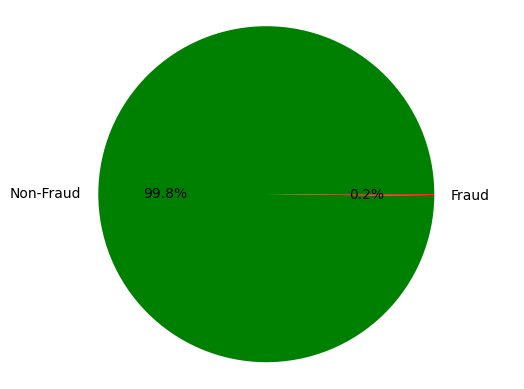

In [ ]:
def draw_classes_pie(df):
    fig, ax = plt.subplots(1, 1)
    ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Non-Fraud','Fraud'], colors=['g','r'])
    plt.axis('equal')
    plt.ylabel('')
draw_classes_pie(df=data_frame)

Hence, we will see compare the size of both classes (Fraud, Non-fraud) and produce a subset of the data with the same number of data points for each class.

(984, 31)


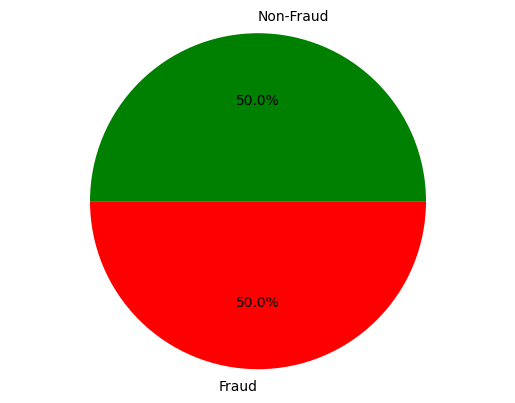

In [ ]:
# The data is extremely implanced which affects the resutls of the naive bayes classifier
# This function generates returns a new pandas dataframe with an equal number of observation for each class
# Sampling randomly from the non-fraud class a sample of size equals the number of the fraud observations
def balance_data(df):
    fraud_frame = df[df["Class"] == 1]
    non_fraud_frame = df[df["Class"] == 0]
    # Shuffle the non-fraud indices
    non_fraud_frame = non_fraud_frame.sample(frac = 1, random_state = SEED)
    # Take a simple which size is equal to the fraud frame then concatincate
    non_fraud_frame = non_fraud_frame.iloc[:fraud_frame.shape[0], :]
    return pd.concat([fraud_frame, non_fraud_frame])

data_frame = balance_data(df=data_frame)
print(data_frame.shape)
draw_classes_pie(df=data_frame)

as per observed above, the balance data function caused the dataset we are working on to be balanced as each of them is represented by half of the dataset

## $\color{salmon} {Data\: Preparation}$


* To be able to use the data, we will have to know if they are normal or not. this can be achieved using the $\color{skyblue} {Shapiro-Wilk\: Test.}$

* $\color{skyblue} {The\:Shapiro-Wilk\: Test}$ helps us determine whether a dataset could be considered as coming from a normally distributed population and commonly usesd as a test for normality.

* $\color{skyblue}{How\: it\: works:}$ the test calculates two things: a test statistic and p-value based on the observed data, then a comparison is made between the p-value and the significance level which is represented by alpha, our model uses a significance level of 5%, if the p-value is greater than our chosen significance level, this means that we failed to reject the null hypothesis, thus the data is normally distributed
---
### $\color{salmon}{In\: the\: context\: of\: Shapiro-Wilk\: test\: our\: hypotheses\: are:}$
* Null hypothesis: The data being tested is normally distributed.
* Other hypothesis: The data does not follow a normal distribution.

In [ ]:
# The Shapiro–Wilk test is a test of normality. In other words, it checks if a column is normally distributed or not
# In the context of Shapiro–Wilk test
#   - Null hypothesis: The data being tested is normally distributed.
#   - Alternative hypothesis: The data does not follow a normal distribution.
def shapiro_test(dataframe, column_name, alpha=0.05):
    data = dataframe[column_name]
    _, p_value = stats.shapiro(data)
    return not(p_value < alpha)

In [ ]:
#Seeing if we have any null values
data_frame.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
#Calculating the numbers of duplicates we have
data_frame.duplicated().sum()

19

In [ ]:
data_frame=data_frame.drop_duplicates()

In [ ]:
data_frame.duplicated().sum()

0

## $\color{salmon} {Data\: Preprosessing}$

### Steps we are taking in order to preprocess the Data:
* Remove the outliers using the IQR Method

* Standardize the features and calculate the Z-score, for mutiple reasosns like comparing different data points within the same column or outlier handling, and improve the model performance

* Splitting the Data Set into Training and test set

---
$\color{salmon}{Tukeys'\: IQR\: Method}$
* In this step we will be using the $\color {skyblue} {IQR\: Method}$ in order to identify the outliers, so we would be able to remove them from the dataset

* the IQR_method function applies $\color{skyblue}{Tukey's\: IQR\: method}$ to identify outliers in a DataFrame for the specified columns -which are the features-. Tukey's IQR method or rather known as $\color{skyblue}{Tukey\: boxplot\: method}$ It relies on the concept of the interquartile range, which measures the spread of data within the middle 50% of a distribution.

* Tukey's method It works by counting the number of outliers for each observation and returns a list of observations that have more than n outliers, as well as a list of unique outlier indices.


In [ ]:
# Defining a function that Takes a dataframe and returns an index list corresponding to the observations
# containing more than n outliers according to the Tukey IQR method.
# https://www.geeksforgeeks.org/interquartile-range-to-detect-outliers-in-data/
def IQR_method(df, n, features):
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column], 75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 4 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_counter = Counter(outlier_list)
    multiple_outliers = [k for k, v in outlier_counter.items() if v > n]

    # Calculate the number of records below and above lower and upper bound values, respectively
    total_outliers = sum(outlier_counter.values())
    # print('Total number of outliers:', total_outliers)
    # print('Number of observations with more than', n, 'outliers:', len(multiple_outliers))

    # Get unique values of the outliers
    unique_outliers = list(set(outlier_list))

    return multiple_outliers, unique_outliers

In [ ]:
feature_list = data_frame.columns.to_list()
feature_list.remove("Class")

In [ ]:
# detecting outliers
Outliers_IQR_M, Outliers_IQR_U = IQR_method(data_frame,1,feature_list)

print('Number of the unique values of the outliers',len(Outliers_IQR_U))

# dropping outliers
data_frame = data_frame.drop(Outliers_IQR_M, axis = 0).reset_index(drop=True)

Number of the unique values of the outliers 181


In [ ]:
# Calculates the sum of values in the Fraud column of the DataFrame
fraud_sum = data_frame['Class'].sum()
print(fraud_sum)

392


In [ ]:
data_frame.shape

(876, 31)

In [ ]:
data_frame.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
5,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,6.754625,-8.948179,0.702725,-10.733854,-1.379520,-1.638960,-1.746350,0.776744,-1.327357,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
7,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,4.560720,-8.873748,-0.797484,-9.177166,-0.257025,-0.871688,1.313014,0.773914,-2.370599,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
8,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,6.439053,-7.520117,0.386352,-9.252307,-1.365188,-0.502362,0.784427,1.494305,-1.808012,0.388307,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
9,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,5.588724,-7.148243,1.680451,-6.210258,0.495282,-3.599540,-4.830324,-0.649090,2.250123,0.504646,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    876 non-null    float64
 1   V1      876 non-null    float64
 2   V2      876 non-null    float64
 3   V3      876 non-null    float64
 4   V4      876 non-null    float64
 5   V5      876 non-null    float64
 6   V6      876 non-null    float64
 7   V7      876 non-null    float64
 8   V8      876 non-null    float64
 9   V9      876 non-null    float64
 10  V10     876 non-null    float64
 11  V11     876 non-null    float64
 12  V12     876 non-null    float64
 13  V13     876 non-null    float64
 14  V14     876 non-null    float64
 15  V15     876 non-null    float64
 16  V16     876 non-null    float64
 17  V17     876 non-null    float64
 18  V18     876 non-null    float64
 19  V19     876 non-null    float64
 20  V20     876 non-null    float64
 21  V21     876 non-null    float64
 22  V2

In [ ]:
data_frame.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,88233.237443,-1.049328,1.064963,-1.993098,1.788822,-0.637801,-0.594564,-1.424464,0.428693,-0.911068,-1.983365,1.522979,-2.487477,-0.111632,-3.035080,-0.022334,-1.587666,-2.385194,-0.735267,0.260521,0.138949,0.260123,0.028697,-0.025959,-0.080244,0.019292,0.034633,0.135791,0.065528,90.648037,0.447489
std,47660.583768,2.721149,2.219433,3.694527,2.767815,2.249146,1.462781,3.021491,1.459259,1.838081,3.422094,2.568890,4.124102,1.044701,4.478208,0.999148,3.083953,5.146907,2.030473,1.245818,0.647694,0.747915,0.692762,0.499503,0.572611,0.580127,0.494566,0.655504,0.341757,167.886702,0.497519
min,0.000000,-15.398845,-7.449015,-21.405836,-4.463847,-10.266255,-6.406267,-16.147363,-6.667938,-7.383705,-16.746044,-2.112659,-18.683715,-3.127795,-19.214325,-3.642393,-14.129855,-25.162799,-9.335193,-3.681904,-4.128186,-2.536077,-1.974473,-5.988806,-2.432631,-2.419446,-1.364911,-4.906786,-1.938737,0.000000,0.000000
25%,48919.250000,-2.046550,-0.184036,-3.933931,-0.323040,-1.264322,-1.316506,-2.101708,-0.165077,-1.839632,-3.599964,-0.304936,-4.162887,-0.873469,-5.888583,-0.606056,-2.554407,-3.912699,-1.212567,-0.449540,-0.172810,-0.165584,-0.482208,-0.204138,-0.414802,-0.298732,-0.312411,-0.053404,-0.047158,1.980000,0.000000
50%,78369.500000,-0.600078,0.760815,-0.884711,1.151610,-0.317842,-0.595891,-0.460941,0.180879,-0.543928,-0.672015,0.804709,-0.567247,-0.110244,-0.708786,0.013709,-0.475112,-0.372102,-0.222896,0.207711,0.018597,0.110948,0.009035,-0.036159,-0.026193,0.044969,-0.003464,0.040686,0.035226,19.970000,0.000000
75%,134758.500000,1.111058,2.124843,0.558859,3.578129,0.509782,0.111520,0.329173,0.765314,0.286361,0.066778,2.871794,0.262329,0.612378,0.161015,0.678044,0.340014,0.369847,0.417309,0.893807,0.364408,0.548096,0.537200,0.168957,0.355785,0.393952,0.362096,0.406998,0.192198,99.670000,1.000000
max,172089.000000,2.318610,9.259492,4.079168,11.927512,6.198304,5.303330,4.031513,7.815968,5.582508,9.263796,12.018913,3.516001,3.063137,4.867317,2.929704,3.139656,6.739384,3.790316,4.851255,3.699560,4.612129,2.151787,2.661291,1.133652,1.701796,2.745261,2.352333,1.909665,1402.160000,1.000000


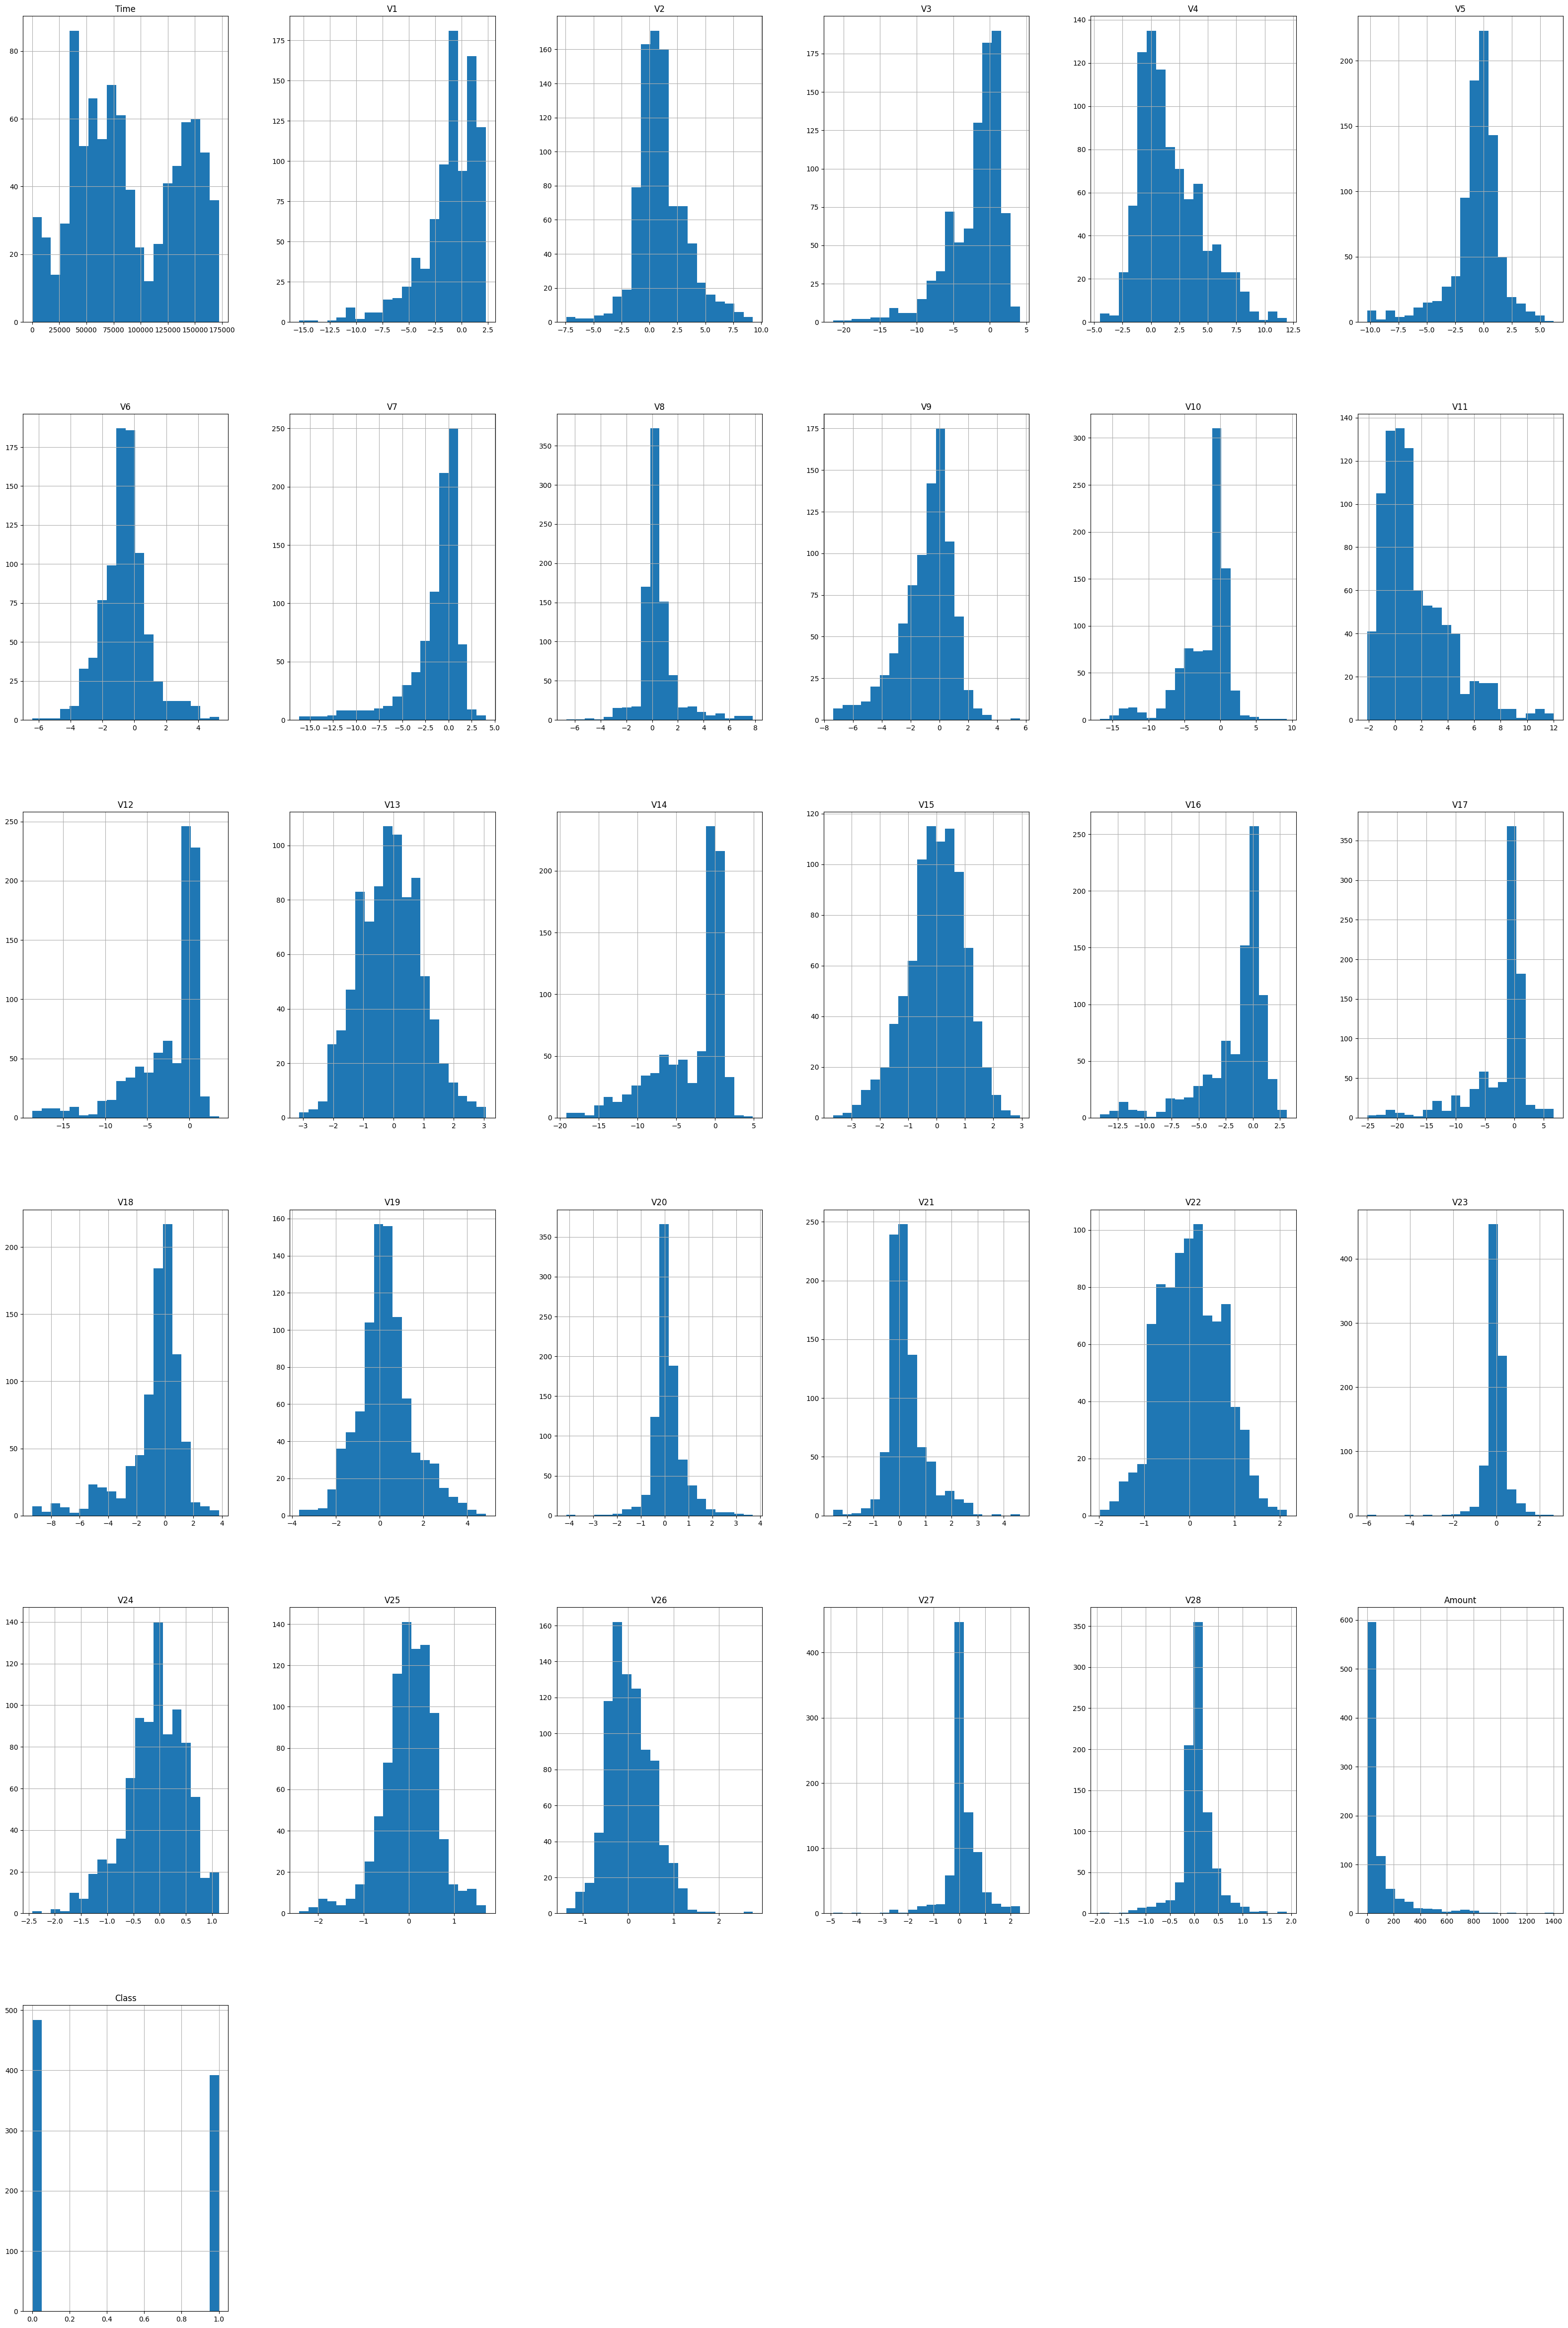

In [ ]:
data_frame.hist(figsize=(40,60), bins=20)
plt.show()

## Feature Selection
We will plot both the **Time** feature and the **Amount** feature to visually inspect ant trend that might by useful to determine if they have a significant predictive power or not.

Time variable


Text(0, 0.5, 'Number of transactions')

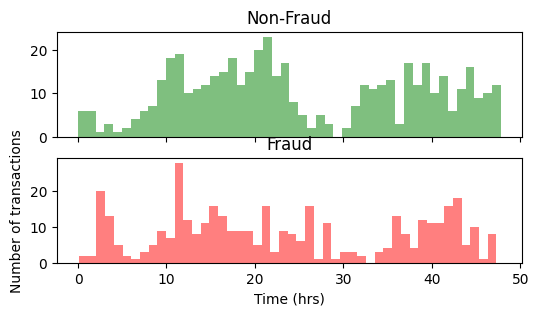

In [ ]:
# Plot Time (in hours) to see if there is any trend
print("Time variable")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(data_frame.Time[data_frame.Class==0]/3600,bins=48,color='g',alpha=0.5)
ax1.set_title('Non-Fraud')
ax2.hist(data_frame.Time[data_frame.Class==1]/3600,bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('Number of transactions')

Text(0, 0.5, '# transactions')

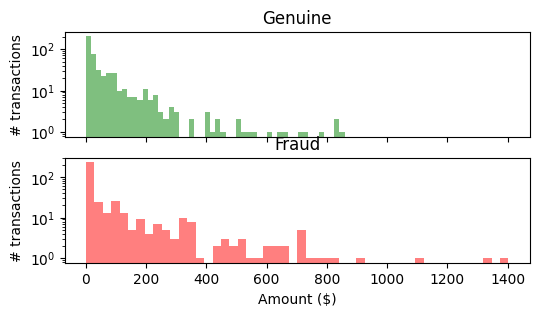

In [ ]:
# Let's check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(data_frame.Amount[data_frame.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log')
ax3.set_title('Genuine')
ax3.set_ylabel('# transactions')
ax4.hist(data_frame.Amount[data_frame.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log')
ax4.set_title('Fraud')
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

Both **Time** and **Amount** don't show a specific differentiating pattern that will yield a significant predictive power and hence we will drop these features and only use the PCA transformed features **V1, V2, ..., V28**.

## $\color{salmon}{Standardize\ the\ features}$

In [ ]:
# This function is used to standardize the features of the data by subtracting mean and dividing
# by the standard deviation.
def stand(data_frame, column):
    z_scores = (data_frame[column] - data_frame[column].mean()) / data_frame[column].std()
    return z_scores

for col in feature_list:
    data_frame.loc[:, col] = stand(data_frame, col)


## $\color {salmon}{Splitting\ the\ DataSet}$

In [ ]:
# This function is used to split the data into two subsets:
#   - 80% of the data will go into the training data
#   - 20% of the data will got into the testing or validation data
def split_data(df):
    y = df['Class'].values # targets/classes
    X = df.drop(['Class'],axis=1).values # features

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = SEED, stratify = y)

    print("train-set size: ", len(y_train), "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    print("fraud cases in train-set: ", sum(y_train))
    return X_train, X_test, y_train, y_test

In [ ]:
data_frame.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.842765,-0.464105,0.399665,0.103734,0.798132,0.051403,-0.568767,-0.368336,0.659900,-1.011392,-0.230533,0.653611,-0.100005,-0.462898,-0.280062,0.412410,0.144917,-0.086433,0.353831,0.125568,-0.018587,0.343768,-0.092017,-0.879378,0.699328,0.043486,0.289560,0.191233,-0.610973,-0.539936,1
1,-1.841380,-0.732857,-1.902409,0.834088,0.180583,0.888162,-0.321482,0.579197,-0.340232,0.348252,0.334526,-0.754238,0.481156,0.754410,0.299908,2.024693,0.731025,0.579943,1.211830,0.018320,3.031355,0.536923,0.587186,2.806638,-0.372957,0.449051,-0.363945,-0.592772,-0.087091,2.610999,1
2,-1.757663,-0.460843,0.312821,0.442101,0.195613,-0.081732,0.354651,0.657551,-0.567302,0.366042,0.133823,0.198503,-0.987523,0.128811,0.349465,-0.677068,-0.225207,-0.465646,-0.926088,-1.280253,-0.878457,-0.741113,-1.387327,0.397766,-0.012374,-0.302358,-1.167207,-0.146795,-0.639510,0.889183,1
3,-1.704705,-1.230600,0.132198,-0.162334,0.321902,-0.218007,-0.760177,-0.685666,-0.464257,0.360866,-0.823552,1.312966,-2.042952,0.283338,-0.834266,0.015021,-1.871111,-1.984342,-2.165151,0.038379,-0.479481,0.419100,0.214029,-0.821312,0.046702,0.401832,-1.399450,-1.468987,2.294163,-0.188508,1
4,-1.693522,0.839191,0.880755,-0.625655,1.063645,1.894943,-0.521733,1.038530,-0.633919,-0.202271,-0.135620,0.225142,-0.514573,1.508575,-0.679794,-0.317173,1.352004,1.772828,1.860532,-2.393909,-0.200540,-0.854631,-1.057907,-1.262947,-2.711108,2.533257,1.076022,-0.222435,0.237785,-0.533979,1


In [ ]:
X_train, X_test,y_train, y_test = split_data(data_frame)

train-set size:  700 
test-set size:  176
fraud cases in test-set:  79
fraud cases in train-set:  313


In [ ]:
df_x_train = pd.DataFrame(X_train)
len(feature_list)

30

######   ${\color{salmon} {Which\: variables\: are\: quantitative\: and\: which\: ones\: are\: categorical}}$
* All the variable are Quantitative

######   ${\color{salmon} {Calculate\: a\: set\: of\: descriptive\: statistics\: to\: quantitatively\: describe\: the\: data:\:}}$
* Measures of central tendency
* Measures of dispersion

In [ ]:
df_x_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,-0.000639,0.018343,0.006887,0.022894,-0.007357,-0.004625,0.014122,0.008338,0.018368,0.005835,0.010005,-0.019594,0.015825,-0.001073,0.010953,0.005392,0.011803,0.005202,0.006308,0.005705,0.009584,-0.003978,-0.008984,0.002926,-0.000106,0.020066,-0.000140,-0.014756,0.018552,-0.019858
std,1.008288,0.981341,0.978491,0.972109,0.991529,0.989867,0.980962,0.981547,1.006907,1.001859,0.981993,0.967971,0.986884,0.984348,0.979669,0.988776,0.994064,1.000299,1.001764,1.002115,0.991381,0.956955,1.007014,0.966822,1.000993,0.955353,0.981207,0.999216,0.930468,0.938363
min,-1.851283,-4.164315,-3.836105,-4.487505,-2.259063,-4.280938,-3.973050,-4.872726,-4.863176,-3.521410,-4.313931,-1.415256,-3.927215,-2.887107,-3.612884,-3.153699,-4.066920,-4.425494,-4.235430,-3.164528,-6.588199,-3.696375,-2.891569,-11.937556,-4.108180,-3.410627,-2.829841,-7.692673,-5.864598,-0.539936
25%,-0.817478,-0.334093,-0.580114,-0.521937,-0.765350,-0.267971,-0.469387,-0.224142,-0.386896,-0.536119,-0.447757,-0.707666,-0.370426,-0.680840,-0.606477,-0.591906,-0.285989,-0.249410,-0.190723,-0.571360,-0.475948,-0.570102,-0.755741,-0.334724,-0.573230,-0.538053,-0.674164,-0.280291,-0.310057,-0.526236
50%,-0.215686,0.179959,-0.157545,0.307296,-0.246879,0.137697,0.012359,0.325668,-0.169822,0.204774,0.370493,-0.280730,0.467700,-0.008715,0.517367,0.032704,0.365131,0.388876,0.242178,-0.038454,-0.187702,-0.200723,-0.030161,-0.021177,0.096311,0.035570,-0.072288,-0.145352,-0.078742,-0.420808
75%,0.988139,0.793924,0.509474,0.695238,0.650357,0.494614,0.490222,0.579420,0.244900,0.672163,0.599029,0.503347,0.676272,0.693031,0.712990,0.718245,0.623422,0.538974,0.568849,0.505162,0.349900,0.383189,0.743945,0.383614,0.765462,0.642937,0.658826,0.395837,0.387436,0.055183
max,1.759436,1.237690,3.692172,1.643584,3.077663,3.039423,3.798639,1.805724,5.062348,3.532802,3.286631,4.085785,1.455705,3.004848,1.764634,2.369003,1.532877,1.772828,2.228832,3.684916,5.497369,4.641400,3.064674,5.379845,2.119933,2.900237,3.740868,3.217831,5.396055,7.411855


In [ ]:
df_x_train.iloc[:, :-1].median()

0    -0.215686
1     0.179959
2    -0.157545
3     0.307296
4    -0.246879
5     0.137697
6     0.012359
7     0.325668
8    -0.169822
9     0.204774
10    0.370493
11   -0.280730
12    0.467700
13   -0.008715
14    0.517367
15    0.032704
16    0.365131
17    0.388876
18    0.242178
19   -0.038454
20   -0.187702
21   -0.200723
22   -0.030161
23   -0.021177
24    0.096311
25    0.035570
26   -0.072288
27   -0.145352
28   -0.078742
dtype: float64

In [ ]:
df_x_train.max() - df_x_train.min()

0      3.610720
1      5.402005
2      7.528277
3      6.131089
4      5.336727
5      7.320361
6      7.771689
7      6.678450
8      9.925524
9      7.054211
10     7.600562
11     5.501042
12     5.382921
13     5.891954
14     5.377518
15     5.522702
16     5.599797
17     6.198322
18     6.464262
19     6.849444
20    12.085568
21     8.337775
22     5.956244
23    17.317401
24     6.228113
25     6.310864
26     6.570709
27    10.910504
28    11.260653
29     7.951791
dtype: float64

In [ ]:
df_x_train.iloc[:, :-1].mode().iloc[0]

0     -1.757663
1     -4.164315
2     -3.836105
3     -4.487505
4     -2.259063
5     -4.280938
6     -3.973050
7     -4.872726
8     -4.863176
9     -3.521410
10    -4.313931
11    -1.415256
12    -3.927215
13    -2.887107
14    -3.612884
15    -3.153699
16    -4.066920
17    -4.425494
18    -4.235430
19    -3.164528
20    -6.588199
21    -3.696375
22    -2.891569
23   -11.937556
24    -4.108180
25    -3.410627
26    -2.829841
27    -7.692673
28    -5.864598
Name: 0, dtype: float64

In [ ]:
df_x_train.iloc[:, :-1].var()

0     1.016645
1     0.963031
2     0.957445
3     0.944997
4     0.983130
5     0.979836
6     0.962287
7     0.963435
8     1.013861
9     1.003721
10    0.964310
11    0.936968
12    0.973940
13    0.968941
14    0.959751
15    0.977677
16    0.988164
17    1.000598
18    1.003532
19    1.004234
20    0.982836
21    0.915763
22    1.014077
23    0.934745
24    1.001987
25    0.912698
26    0.962767
27    0.998433
28    0.865771
dtype: float64

######   ${\color{salmon} {Plotting\: the\: Histogram}}$

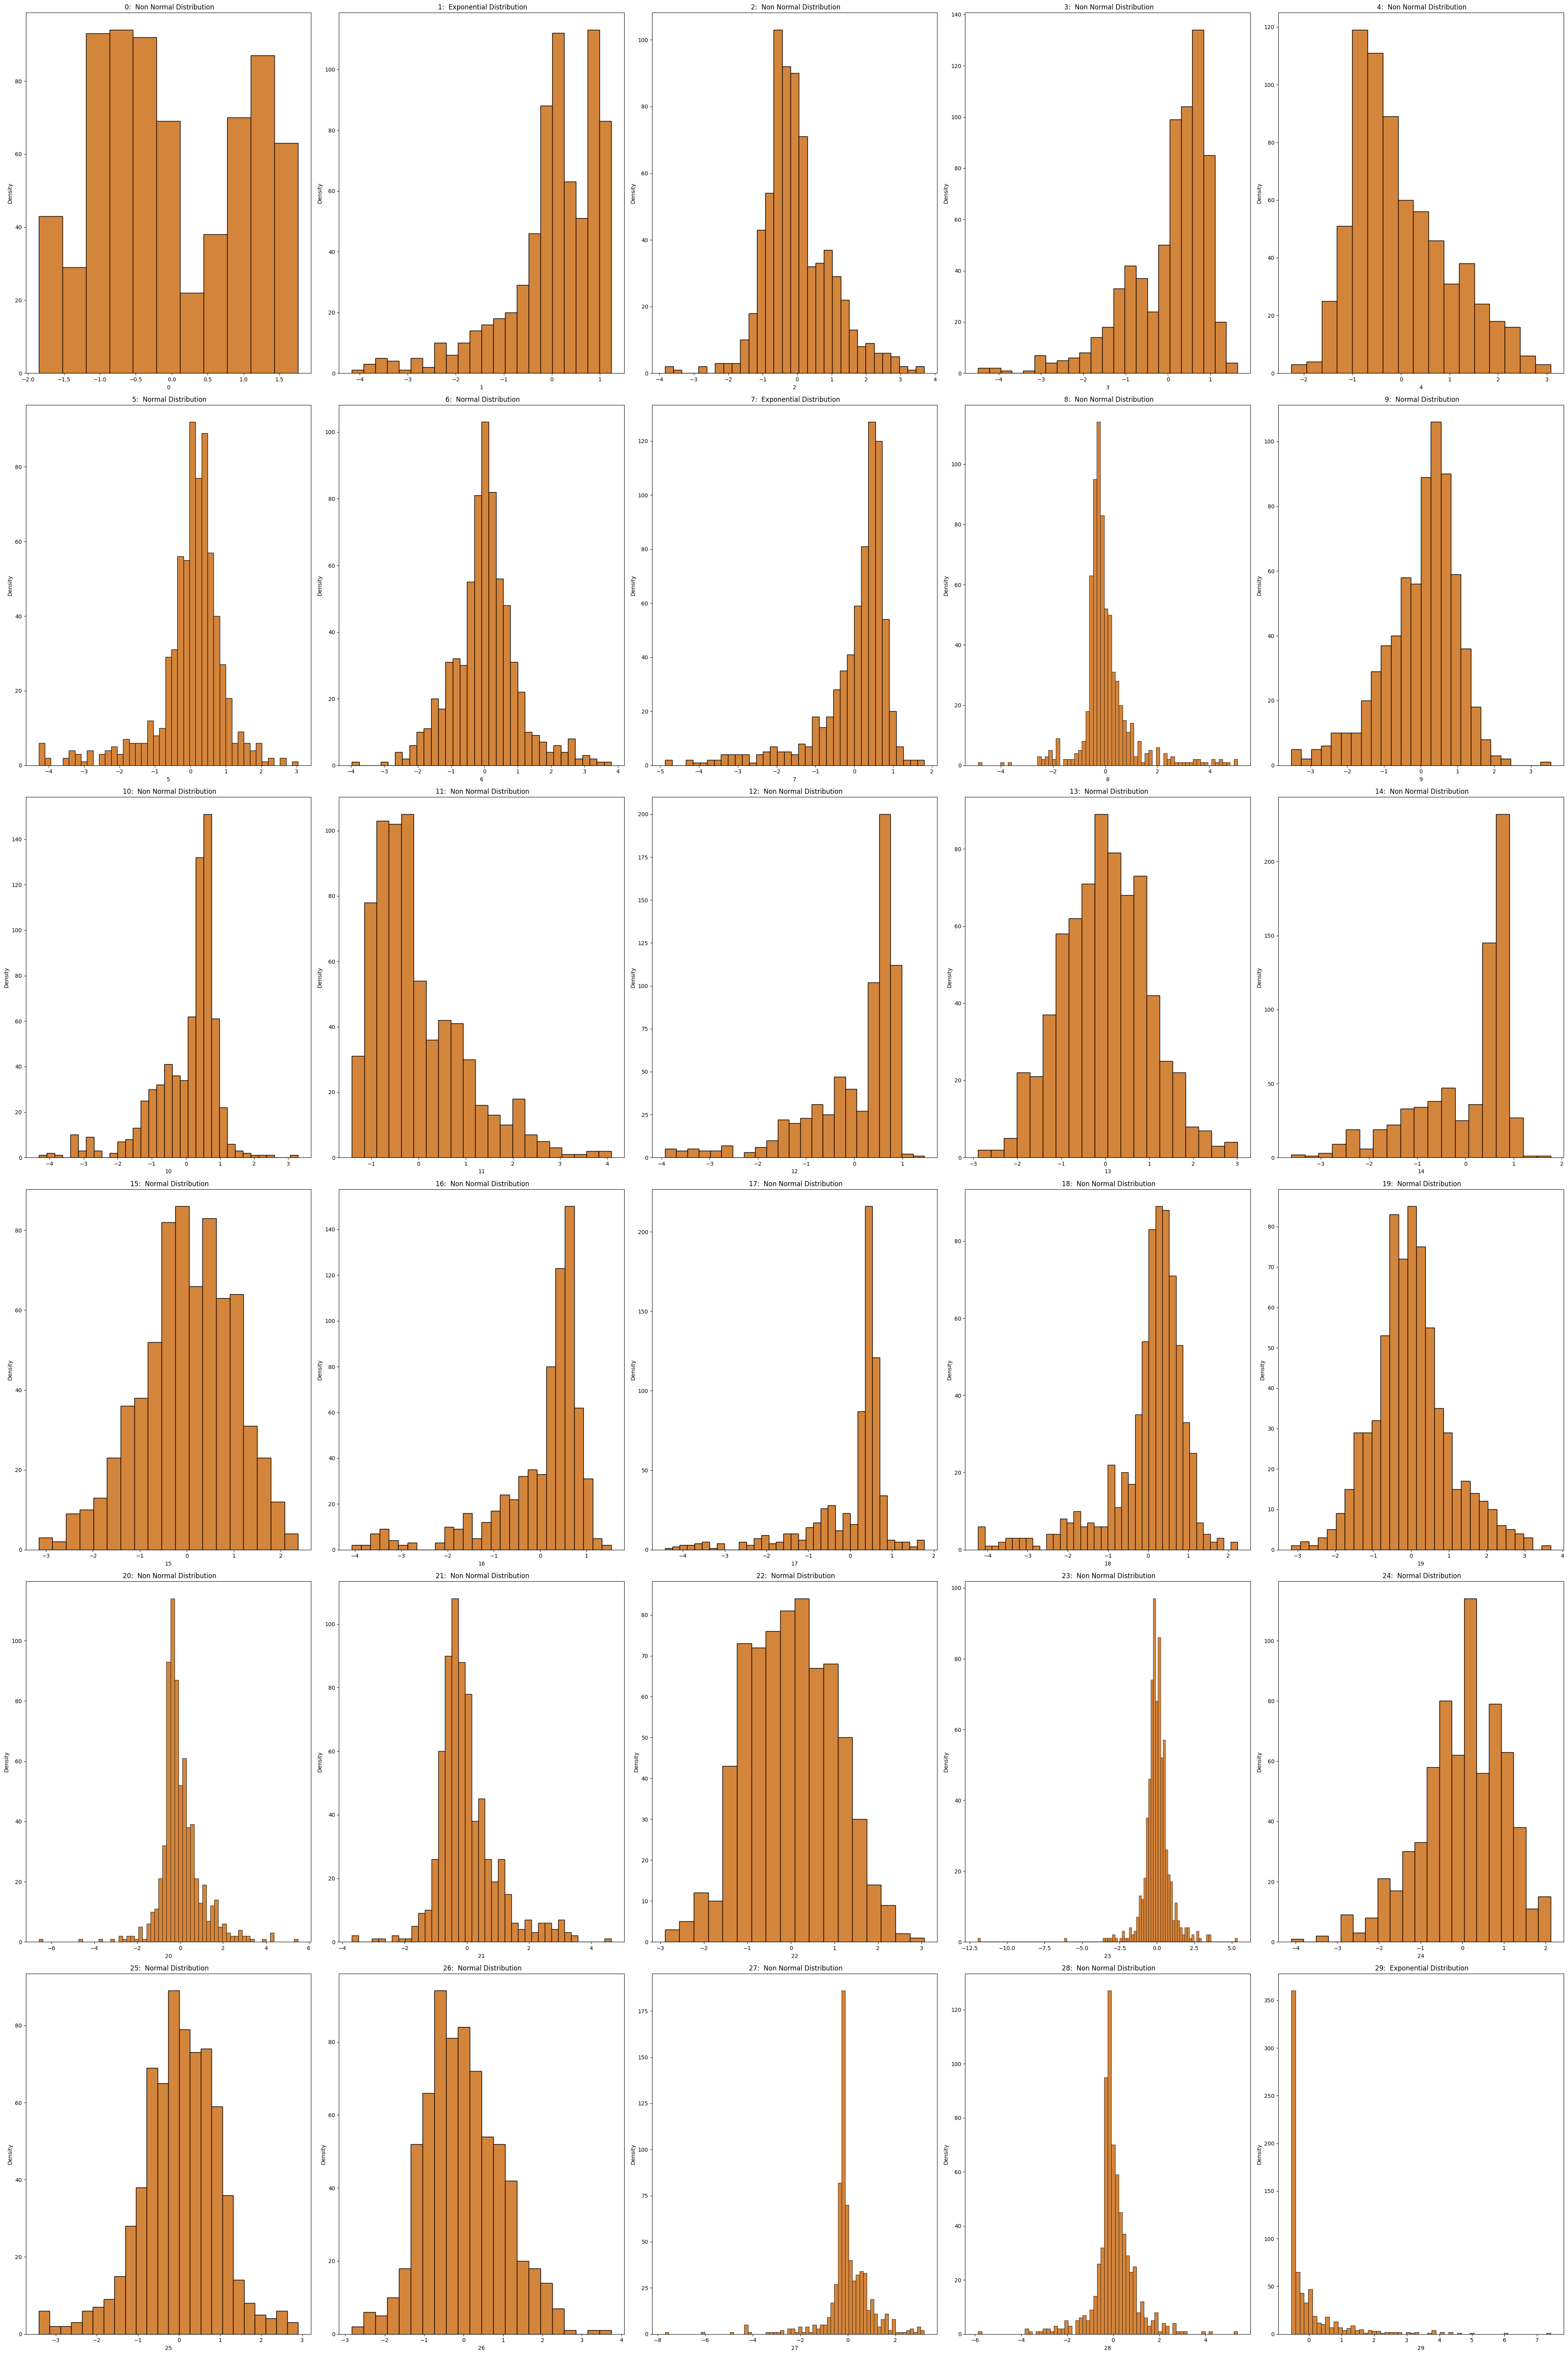

In [ ]:

# Calculate the number of rows and columns for the subplot grid
n_rows = (len(df_x_train.columns) - 1) // 5 + 1
n_cols = min(len(df_x_train.columns) - 1, 5)

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(40, 60))

axes = axes.flatten()

output_column = "Class"
distribution_type = {
    0 : "Non Normal",
    1 : "Exponential",
    2 : "Non Normal",
    3 : "Non Normal",
    4 : "Non Normal",
    5 : "Normal",
    6 : "Normal",
    7 : "Exponential",
    8 : "Non Normal",
    9 : "Normal",
    10 : "Non Normal",
    11 : "Non Normal",
    12 : "Non Normal",
    13 : "Normal",
    14 : "Non Normal",
    15 : "Normal",
    16 : "Non Normal",
    17 : "Non Normal",
    18: "Non Normal",
    19 : "Normal",
    20 : "Non Normal",
    21 : "Non Normal",
    22 : "Normal",
    23 : "Non Normal",
    24 : "Normal",
    25 : "Normal",
    26 : "Normal",
    27 : "Non Normal",
    28 : "Non Normal",
    29 : "Exponential"

}
for i, feature_column in enumerate(df_x_train.columns):
    if feature_column != output_column:
        # Select the current subplot
        ax = axes[i]

    sns.histplot(df_x_train[feature_column], ax=ax)
    sns.histplot(df_x_train[feature_column],  ax=ax)

    ax.set_title(f' {feature_column}:  {distribution_type[i]} Distribution')
    ax.set_xlabel(feature_column)
    ax.set_ylabel('Density')
# Hide any empty subplots
if len(df_x_train.columns) < len(axes):
    for j in range(len(df_x_train.columns), len(axes)):
        axes[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.960107,-1.026655,1.040873,-0.947292,1.570753,1.527245,-1.402532,-0.080909,-2.087529,-1.651056,-0.754476,1.002081,-0.718566,-0.817517,-1.757261,0.549750,0.145239,0.625780,0.554079,-1.364669,-0.129928,-2.056297,0.997392,0.955117,-0.310594,1.097757,1.055557,0.920807,-0.785874,-0.533979
1,-1.063399,-0.800205,-1.084761,0.678150,-0.015460,0.631418,0.632197,0.921541,-0.720410,1.062981,0.955290,0.067493,0.532016,-0.581617,0.157703,0.933311,0.543934,0.593901,0.792944,0.429320,-1.380552,-1.411979,0.720680,1.495725,-0.553577,0.053676,-0.494045,0.958057,-0.439884,1.148405
2,1.331389,1.187082,-0.728964,0.199645,-0.812954,0.064823,-0.400816,0.410450,-0.607481,0.086327,0.854729,-0.930286,0.694470,1.511682,0.682699,0.426058,0.048522,0.396110,0.861980,-0.988238,-1.006856,-0.519210,0.326308,0.229702,0.058212,-0.061872,1.542910,-0.292578,-0.371827,-0.440464
3,-1.692850,0.501916,1.236403,-0.980386,1.538622,0.974516,-1.406081,0.224354,-0.255683,-0.961661,-0.869680,1.913696,-1.220300,0.476676,-1.388329,-1.343999,0.351920,0.615830,1.098055,-1.660382,0.384994,-0.068584,-0.780128,-1.116818,-0.243797,2.508868,0.923150,0.584402,0.986082,-0.533979
4,-0.738603,0.461351,0.145261,0.256545,0.881512,-0.448947,0.282795,-0.502803,0.294987,-0.147260,-0.325280,0.653174,0.008886,0.409928,-0.750767,-2.109190,-0.272283,-0.400877,-0.234898,-0.181299,0.328141,0.279545,0.456482,-0.356035,0.797898,1.200072,0.386944,0.751718,0.744360,-0.535409


######   ${\color{salmon} {Plotting\: the\: conditional\: distribution}}$

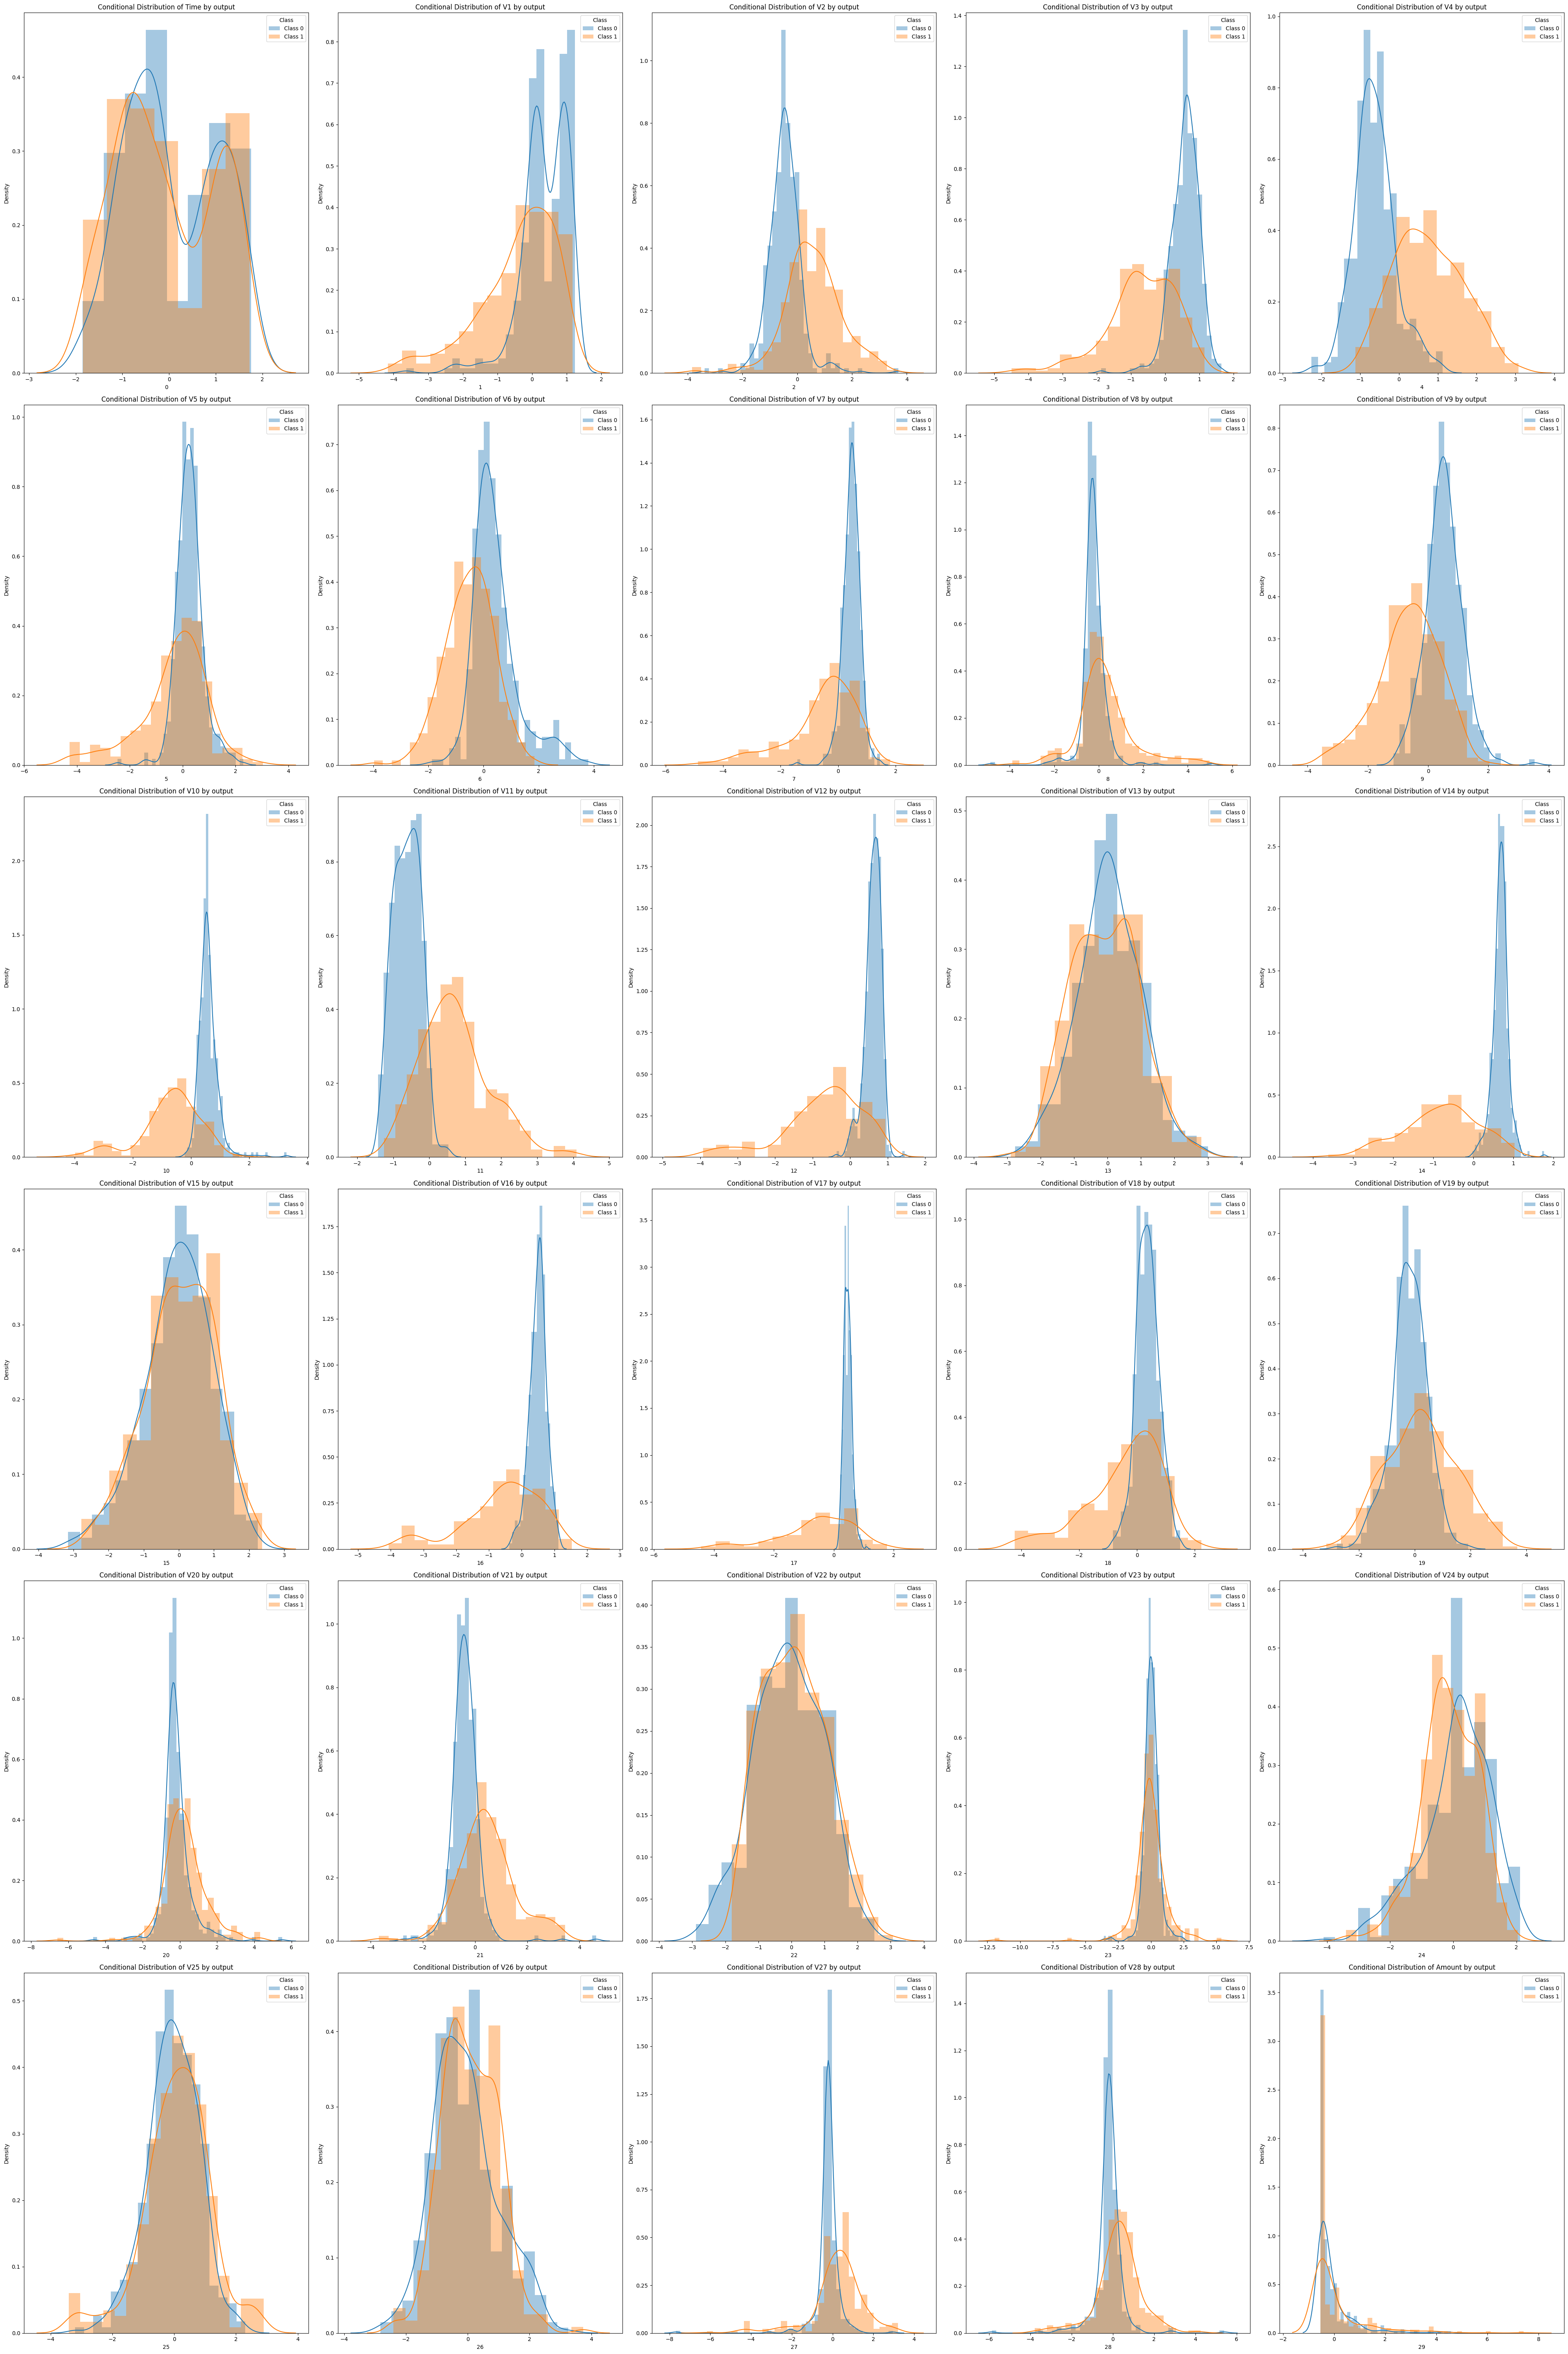

In [ ]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(40, 60))

axes = axes.flatten()

for i, feature_column in enumerate(df_x_train.columns):

    ax = axes[i]


    sns.distplot(df_x_train[y_train == 0][feature_column], kde=True, label='Class 0', ax=ax)
    sns.distplot(df_x_train[y_train == 1][feature_column], kde=True, label='Class 1', ax=ax)

    ax.set_title(f'Conditional Distribution of {feature_list[i]} by output')
    ax.set_xlabel(feature_column)
    ax.set_ylabel('Density')
    ax.legend(title=output_column)

# Hide any empty subplots
if len(df_x_train.columns) < len(axes):
    for j in range(len(df_x_train.columns), len(axes)):
        axes[j].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()

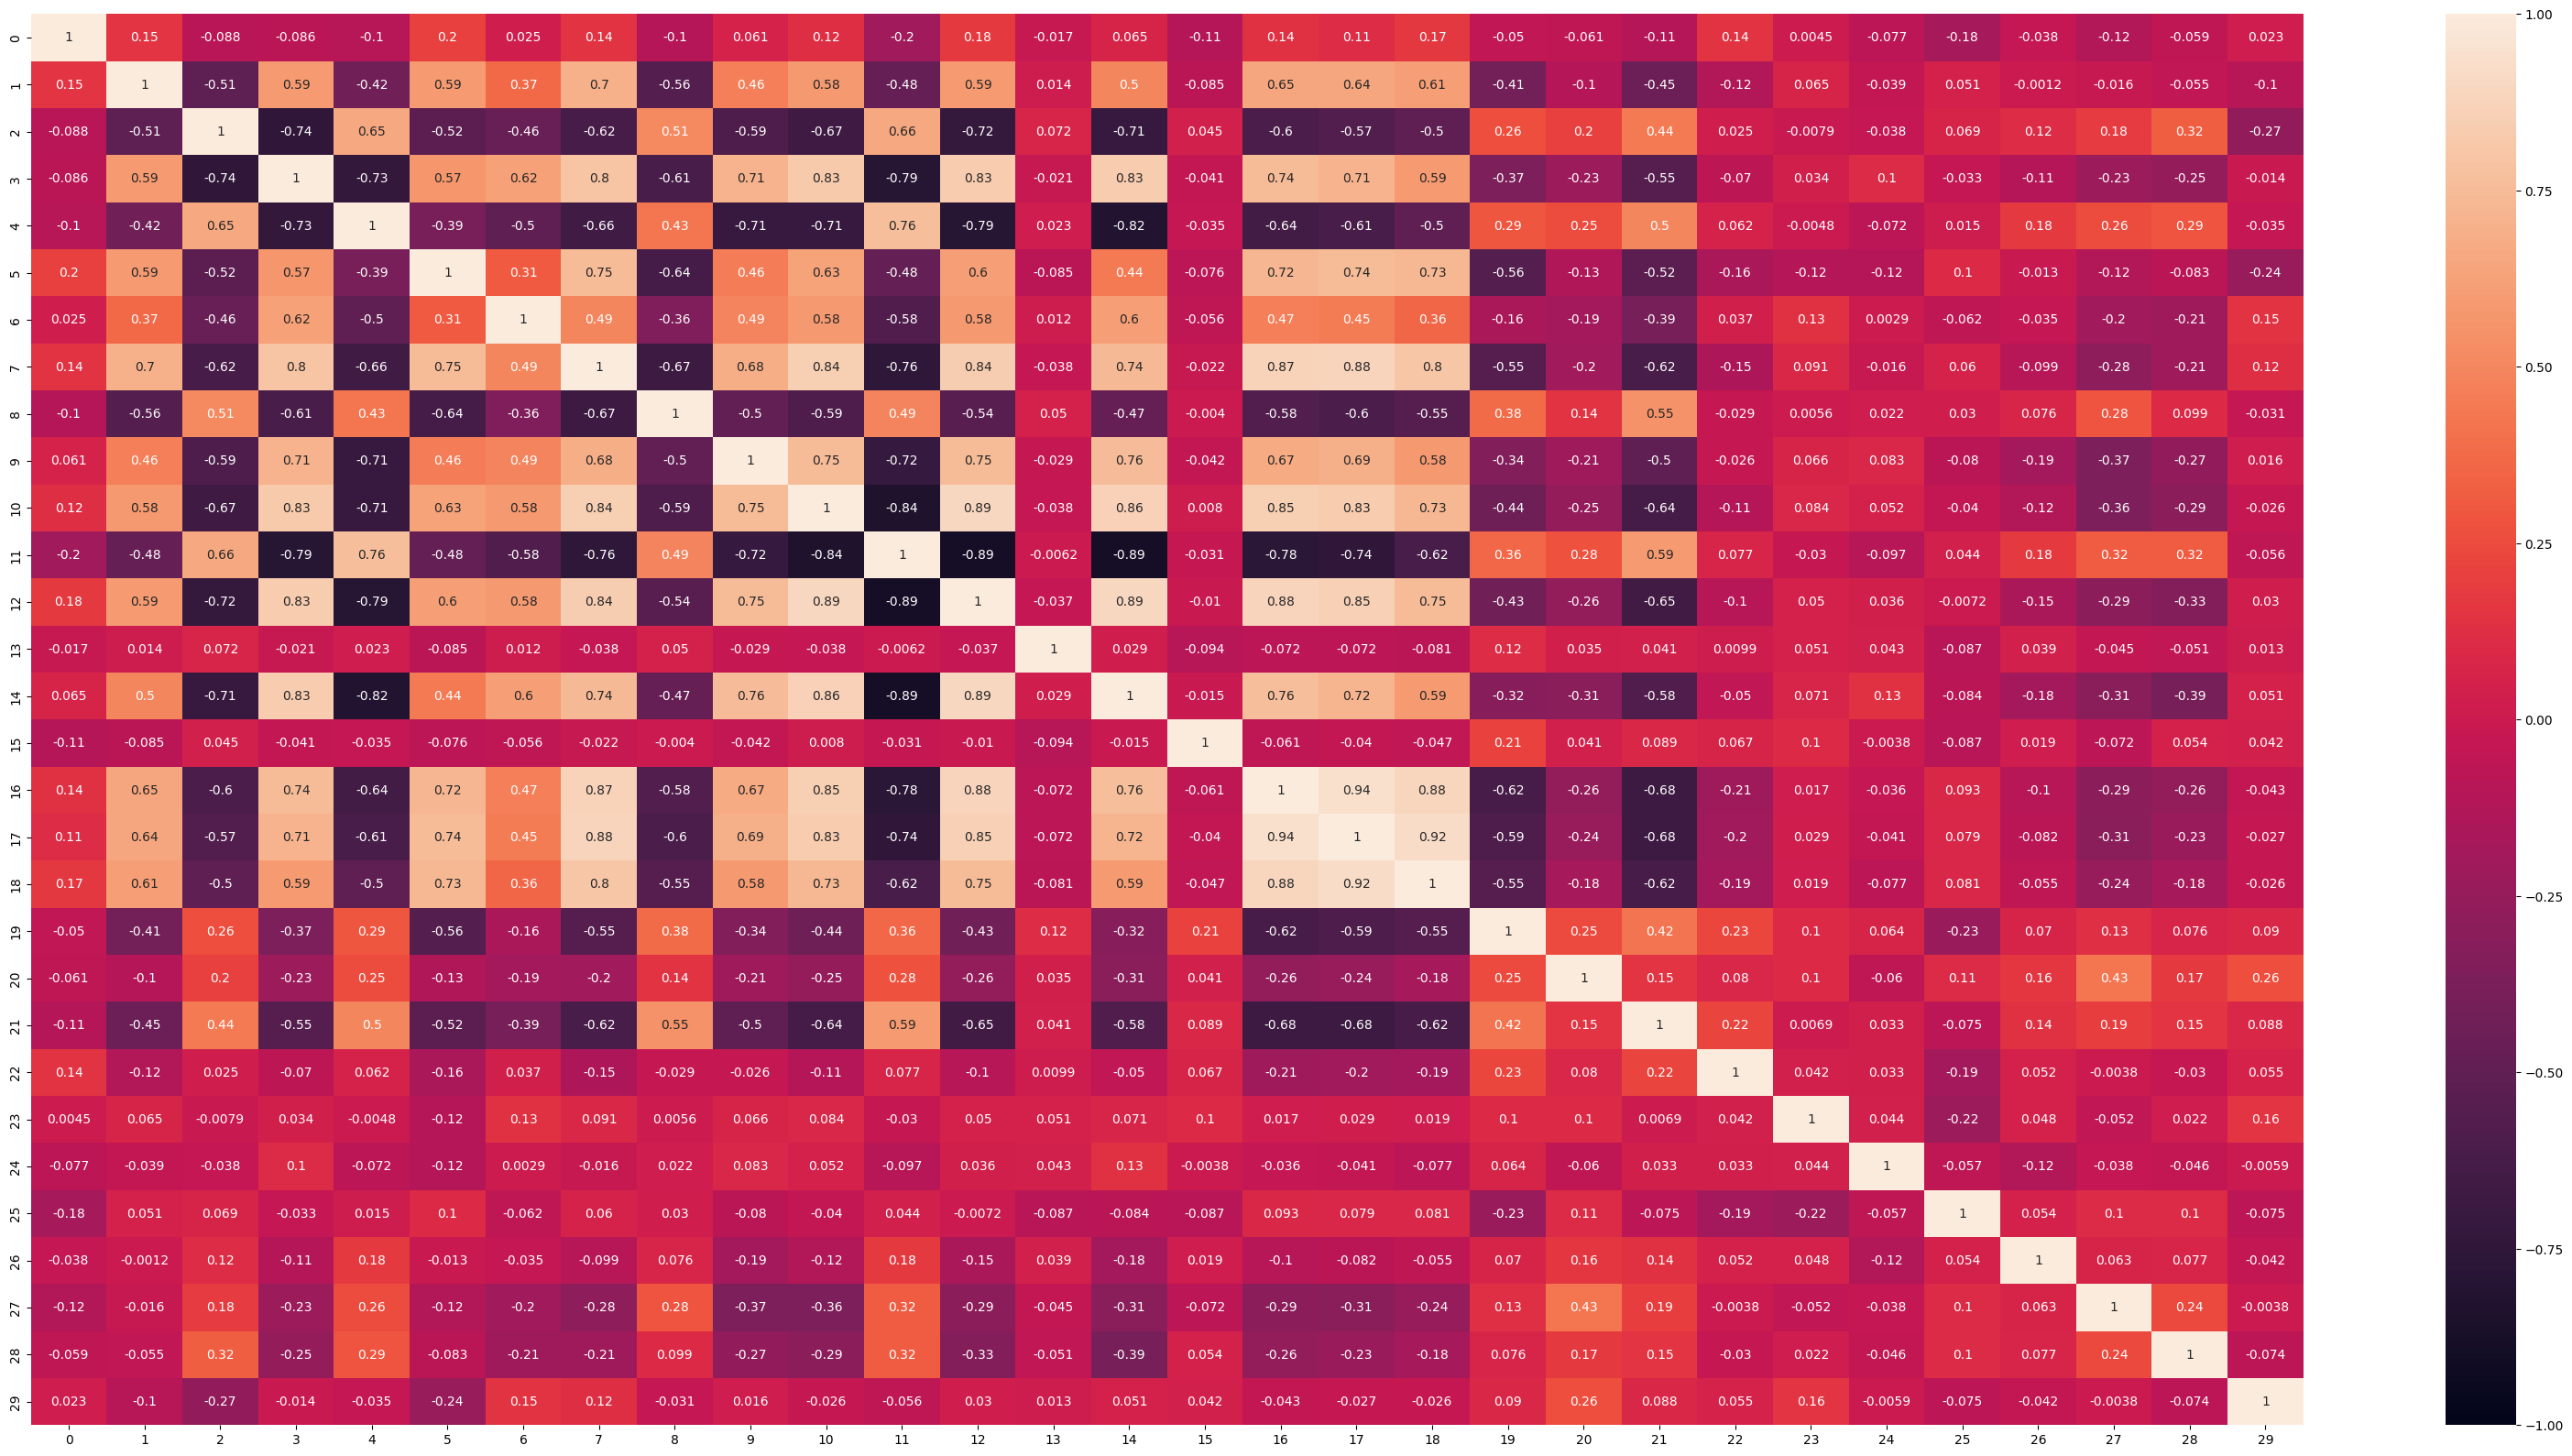

In [ ]:
plt.figure(figsize=(40, 20))
heatmap = sns.heatmap(df_x_train.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
class NaiveBayesClassifier:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)


    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        for idx, c in enumerate(self._classes):
            log_prior = np.log(self._priors[idx])
            # log of prodcuts is the same as sum of logs
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + log_prior
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [ ]:
def print_scores(y_test,y_pred):
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix

def draw_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    # Define class labels
    classes = ['Non-fraud', 'Fraud']
    # Plot the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
def accuracy(y_true, y_pred):
    acc = np.sum(y_true == y_pred) / len(y_true)
    return acc

In [ ]:
# Feeding the data to our own NB classifier
model = NaiveBayesClassifier()
model.fit(X_train, y_train)
y_predict_nv = model.predict(X_test)
print(f"Accuracy on credit card fraud detection is {accuracy(y_test, y_predict_nv)}")

Accuracy on credit card fraud detection is 0.9090909090909091


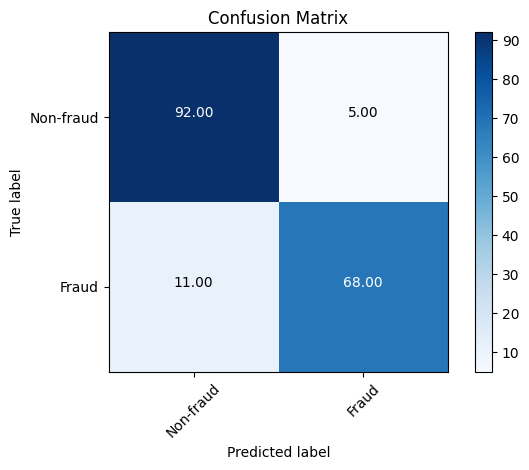

recall score:  0.8607594936708861
precision score:  0.9315068493150684
f1 score:  0.8947368421052632
accuracy score:  0.9090909090909091


In [ ]:
# Corresponding Confusion Matrix
draw_confusion_matrix(y_test, y_predict_nv)
print_scores(y_test ,y_predict_nv)

#### ${\color{salmon}{Comparing\: with\: other\: Algorithms\:}}$

In [ ]:
naive_bayes = GaussianNB()

# Train the classifier on the training data
naive_bayes.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test)

In [ ]:
# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9090909090909091


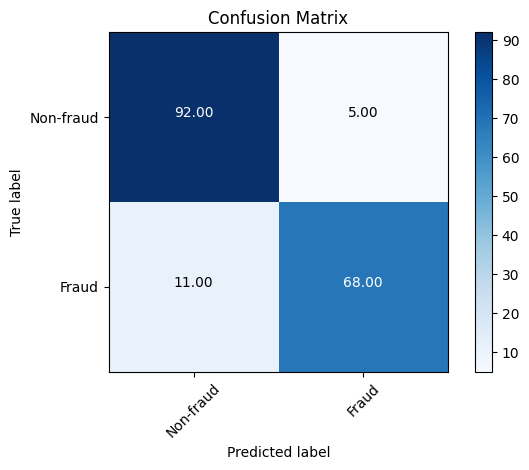

recall score:  0.8607594936708861
precision score:  0.9315068493150684
f1 score:  0.8947368421052632
accuracy score:  0.9090909090909091


In [ ]:
# The confusion matrix of the gaussian NB
draw_confusion_matrix(y_test,y_pred)
print_scores(y_test,y_pred)

In [ ]:
# Decision Tree Algorithm
tr = DecisionTreeClassifier()
tr.fit(X_train, y_train)
y_pred_tr = tr.predict(X_test)

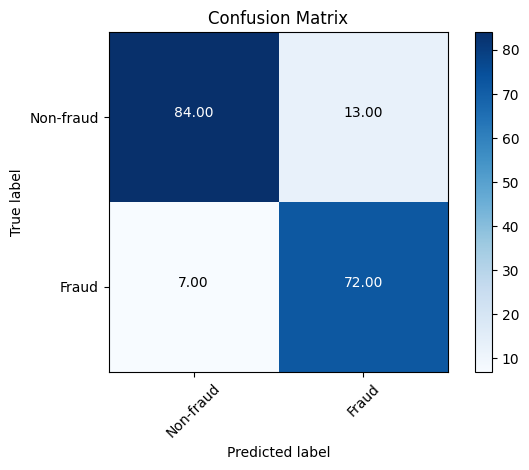

recall score:  0.9113924050632911
precision score:  0.8470588235294118
f1 score:  0.8780487804878048
accuracy score:  0.8863636363636364


In [ ]:
# Confusion matrix of the Decision Tree Algorithm
draw_confusion_matrix(y_test,y_pred_tr)
print_scores(y_test,y_pred_tr)

In [ ]:
# Logistic Regression Algorithm
lg_rg = LogisticRegression()
lg_rg.fit(X_train, y_train)
y_pred_lg = lg_rg.predict(X_test)

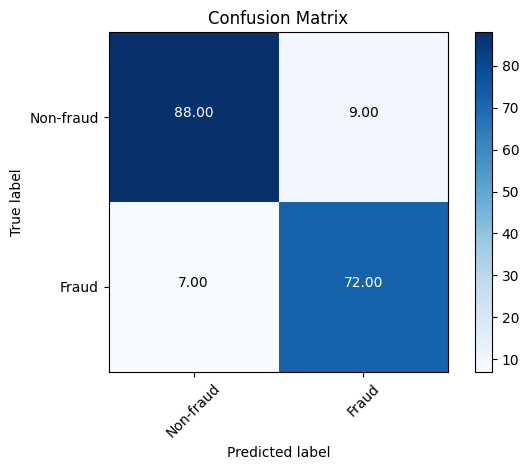

recall score:  0.9113924050632911
precision score:  0.8888888888888888
f1 score:  0.8999999999999999
accuracy score:  0.9090909090909091


In [ ]:
# Confusion matrix of the Logistic Regression Algorithm
draw_confusion_matrix(y_test,y_pred_lg)
print_scores(y_test,y_pred_lg)

## Summary of performances of different Algorithms

| Points of comparison      | Naive Bayes(our classifier) | Gaussian Naive Bayes     | Decision Tree|  Logistic Regression|
| :---        |    :----:   |          ---: |   ---: |  ---: |
| Recall acore      | 0.85       | 0.85   | 0.9 | 0.91 |
| Precision score   | 0.94        | 0.94  |0.85 | 1.0 |
| F1 score          | 0.89          |    0.89  | 0.87| 0.95|
| Accuracy score    | 0.91       |  0.91     | 0.0.88 | 0.96|

As it appears here in the table, the Naive Bayes Classifier and the logistic regression ended up with the same accruacy and the highest amongst all of the other built in model